# Question 7
A Receiver Operating Characteristic Curve, aka ROC Curve, is a graphical illustration of the ability
of a binary classifier when its discrimination threshold is changed. It is created by plotting the True
Positive Rate (TPR), i.e. the Sensitivity or Recall, with respect to the False Positive Rate (FPR) at
various threshold settings.

#### a) Assuming $p(w_0)=0.6$, determine and sketch the decision regions for the minimum-error decision rule. Call them R0 and R1.

$$p(w_0|x)\geq p(w_1|x) \rightarrow p(w_0)p(x|w_0)\geq p(w_1)p(x|2_1) \rightarrow 3 p(x|w_0) \geq  2 p(x|2_1) $$

Doing some elementary calculation, we can find out that for $x \in [3+\frac{3}{8}, 6 - \frac{3}{8}] $, $ 3 p(x|w_0) \leq 2 p(x|2_1) $ <br>
So the R1 is $[3+\frac{3}{8}, 6 - \frac{3}{8}]$ and R0 is R-R1


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import sys

Sketch


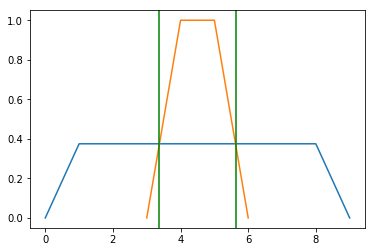

In [10]:
x1 = [0,1,8,9]
y1=[0,3/8, 3/8, 0]
x2 = [3,4,5,6]
y2=[0,1,1,0]
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.axvline(x=3 + 3/8, c="g")
plt.axvline(x=6 - 3/8, c="g")
print ("Sketch")
plt.show()


#### b) Compute the corresponding probability of error.

$$p(error|w_1) = \epsilon_1 = \frac{3}{8} \frac{3}{8} \frac{1}{2} \frac{1}{2} * 2 = \frac{9}{128}, p(w_1)=0.4 \rightarrow p(w_1)*\epsilon_1 = \frac{9}{320}$$
$$p(error|w_0)=\epsilon_0 = (3 - \frac{3}{4})\frac{1}{8} = \frac{9}{4} , p(w_0)=0.6 \rightarrow p(w_0)*\epsilon_0 = \frac{27}{20}$$
$$ p(error) = p(error, w_0)+p(error, w_1) =\frac{9}{320}+\frac{27}{20}=1.378125$$

#### c) Plot ROC Curve 

In [21]:
def error_0 (x):
    if (x>=9):
        return 0
    if (8<=x<=9):
        return (x-9)**2 * (1/16)
    if (1<=x<=8):
        return 1/16 + (8-x)/8
    if (0<=x<=1):
        return 1 - (x**2)/16
    if (x<=0):
        return 1
    return -1
def error_1(x):
    if (x>=6):
        return 1
    if (5<=x<=6):
        return 1 - ((x-6)**2)/4
    if (4<=x<=5):
        return 1/4 + (x-4)/2
    if (3<=x<=4):
        return ((x-3)**2)/4
    if (x<=3):
        return 0
    return -1
def prob_error_0(x):
    # if (error_0(x)<0):
    #     print (x)
    #     sys.exit(0)
    return 0.6 * error_0(x)
def prob_error_1(x):
    # if (error_1(x)<0):
    #     print (x)
    #     sys.exit(0)
    return 0.4*error_1(x)

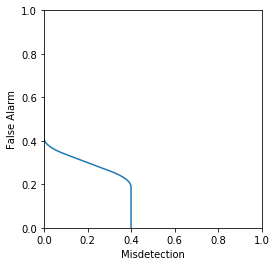

In [24]:
x = np.arange(-2,12, 0.1)
mis_det = np.zeros(len(x))
false_alarm = np.zeros(len(x))
for i in range(0, len(x)):
    mis_det[i]= prob_error_1(x[i])
    false_alarm[i]=prob_error_0(x[i])
plt.plot(mis_det, false_alarm)
plt.xlabel("Misdetection")
plt.ylabel("False Alarm")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.show()